importing Jupyter notebook from environment.ipynb
importing Jupyter notebook from utils.ipynb


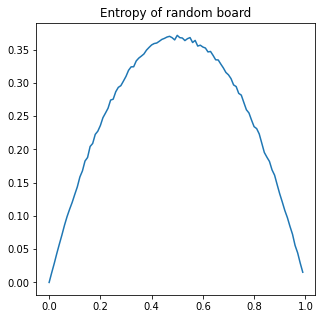

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import import_ipynb
from environment import GameOfLifeEnv
from utils import get_entropy, scope_magic

Testing the render function and the plotting of rewards.

<IPython.core.display.Javascript object>


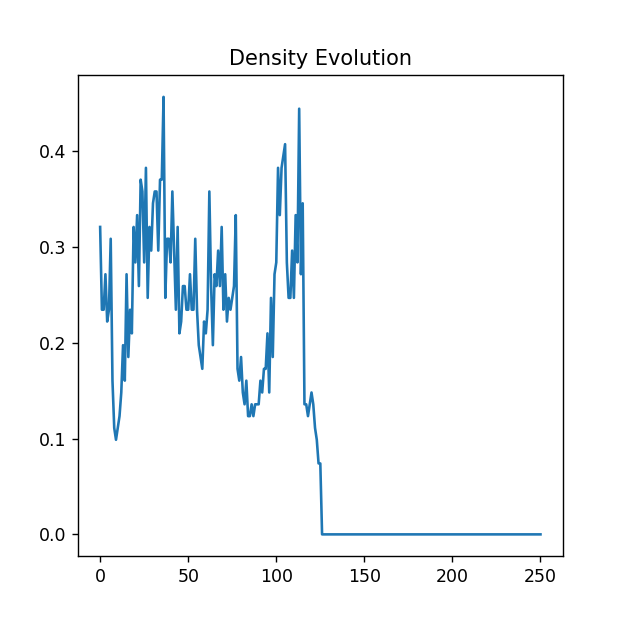

<IPython.core.display.Javascript object>

In [4]:
%matplotlib notebook

env = GameOfLifeEnv(grid_size=9, density=0.5, seed=9153, save_states = True)

rewards = np.zeros(251)

done = False
i = 0
while not done:
    state, r, done = env.step(None)
    rewards[i] = r
    i += 1
    
# plot the reward evolution
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(rewards)
ax.set_title('Density Evolution')

# grid animation
ani = env.render()
plt.show()


## Fixed grid size; fixed initial density; vary inital state (random seed) 


<IPython.core.display.Javascript object>


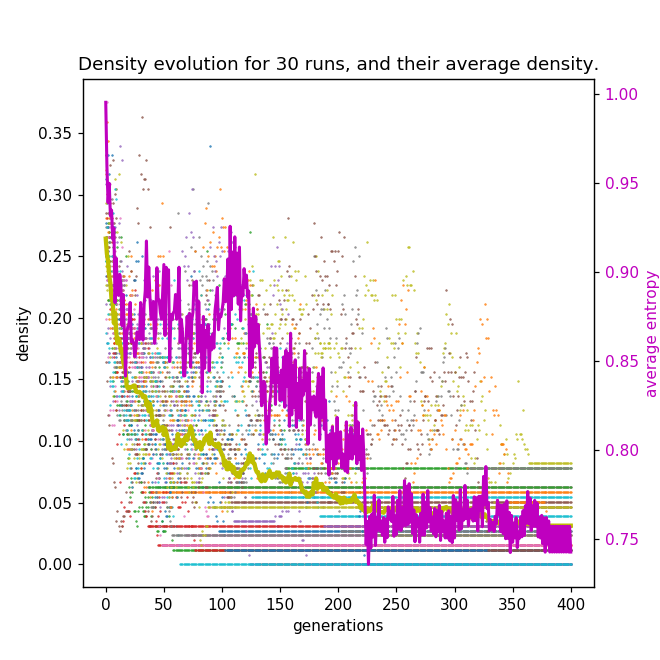

[0.99522947 0.95937345 0.93893773 0.94978041 0.93156044 0.93473426
 0.91846334 0.92470974 0.88281357 0.907812   0.89067481 0.8868752
 0.8986751  0.89347156 0.86988888 0.88737104 0.8661915  0.84156348
 0.8652638  0.86928954 0.87065922 0.88290505 0.86083712 0.8619956
 0.85999677 0.85241147 0.85729015 0.86641729 0.86365014 0.86206435
 0.88285558 0.87036389 0.86176537 0.8817313  0.88954577 0.91738402
 0.88601016 0.90278295 0.88596592 0.87340397 0.87450873 0.88345882
 0.85994581 0.86692677 0.90240234 0.88505138 0.88436678 0.87716789
 0.8735488  0.88884778 0.90419989 0.86439784 0.90266343 0.89193875
 0.90127464 0.84971294 0.87604075 0.87323326 0.87695574 0.87811619
 0.88737197 0.87346585 0.88178177 0.90267433 0.86048669 0.87348743
 0.86638092 0.84168707 0.84174398 0.86067602 0.87508017 0.86413637
 0.87682907 0.84661619 0.87322418 0.87733003 0.89432846 0.88991278
 0.89489059 0.85453764 0.88335505 0.85552031 0.8700102  0.83223454
 0.87506504 0.8459715  0.86712446 0.85800179 0.87043066 0.844431

In [70]:
env = GameOfLifeEnv(grid_size=16, density=0.5) #, save_states = True)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
average_densities = np.zeros(401)
average_entropies = np.zeros(401)
number_of_runs = 30

for i in range(number_of_runs):
    state = env.reset()
    rewards = []
    entropies = []

    done = False
    for j in range(401):
        if not done:
            state, r, done = env.step()
        rewards.append(r)
        entropies.append(get_normalized_entropy(state, 3))
        
    ax.plot(rewards, '.', markersize=1)
    
    average_densities = (i * average_densities + rewards) / (i + 1)
    average_entropies = (i * average_entropies + entropies) / (i + 1)

ax.plot(range(401), average_densities, 'y', linewidth=2.8)
ax.set_title(f'Density evolution for {number_of_runs} runs, and their average density')
ax.set_xlabel('generations')
ax.set_ylabel('density')

ax2 = ax.twinx()
ax2.set_ylabel('average entropy', color='m')
ax2.tick_params(axis='y', labelcolor='m')
ax2.plot(range(401), average_entropies, 'm', linewidth=2)
print(average_entropies)
# print(average_entropies)

plt.show()

Conclusion:
- There is big variance, but some statistics could still be calculated from the game evolution (e.i. average time to stagnation, average density, etc.)

## Vary grid size; fixed initial density

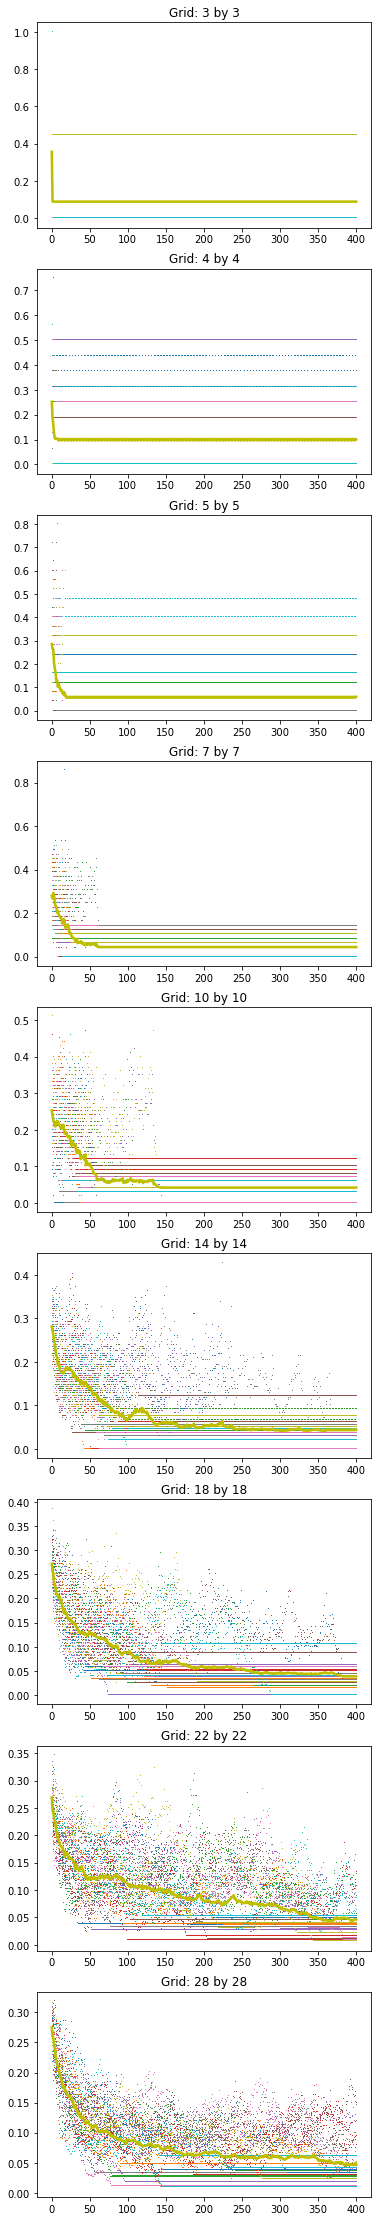

In [70]:
%matplotlib inline

grid_sizes = [3, 4, 5, 7, 10, 14, 18, 22, 28]
averages = np.zeros((len(grid_sizes), 401))
runs_per_grid = 30
fig, axes = plt.subplots(len(grid_sizes), 1, figsize=(6, 40))
# fig, axes = plt.subplots(1, 1, figsize=(6, 6))

for j, g in enumerate(grid_sizes):
    env = GameOfLifeEnv(grid_size=g, density=0.5) #, save_states = True)
    
    for i in range(runs_per_grid):
        state = env.reset()
        rewards = []

        done = False
        while not done:
            state, r, done = env.step()
            rewards.append(r)

        rewards_filled = np.append(np.array(rewards), rewards[-1] * np.ones(401 - len(rewards)))
        
        axes[j].plot(np.array(rewards_filled) / g ** 2, ',')
        averages[j] = (i * averages[j] + rewards_filled) / (i + 1)
        
    axes[j].plot(averages[j] / g ** 2, 'y', linewidth=2.6)
    axes[j].set_title(f'Grid: {g} by {g}')                     
        
plt.show()

Conclution:  
- small grids stagnates very fast
- all grids converge to a similar density

## Vary initial density - average over seeds; fixed grid size

<IPython.core.display.Javascript object>


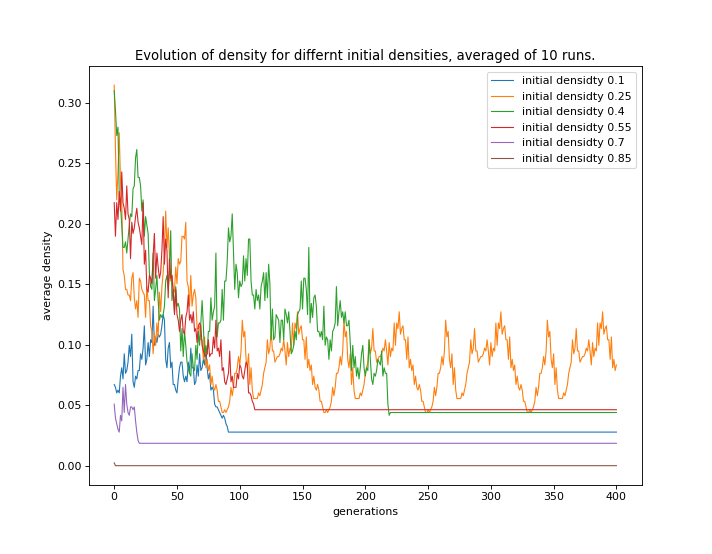

In [47]:
grid_size = 12
n_average = 3
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

for d in np.arange(0.1, 0.9, 0.15):
    env = GameOfLifeEnv(grid_size=grid_size, density=d) #, save_states = True)
    average = np.zeros(401)

    for i in range(n_average):
        state = env.reset()
        rewards = []

        done = False
        while not done:
            state, r, done = env.step()
            rewards.append(r)


        rewards_filled = np.append(np.array(rewards), rewards[-1] * np.ones(401 - len(rewards)))
        average = (i * average + rewards_filled) / (i + 1)

    ax.plot(average / grid_size ** 2, linewidth=1, label=f'initial densidty {d.round(2)}')

plt.legend()
plt.xlabel('generations')
plt.ylabel('average density')
plt.title(f'Evolution of density for differnt initial densities, averaged of {n_average} runs.')
plt.show()

More on initial density

<IPython.core.display.Javascript object>


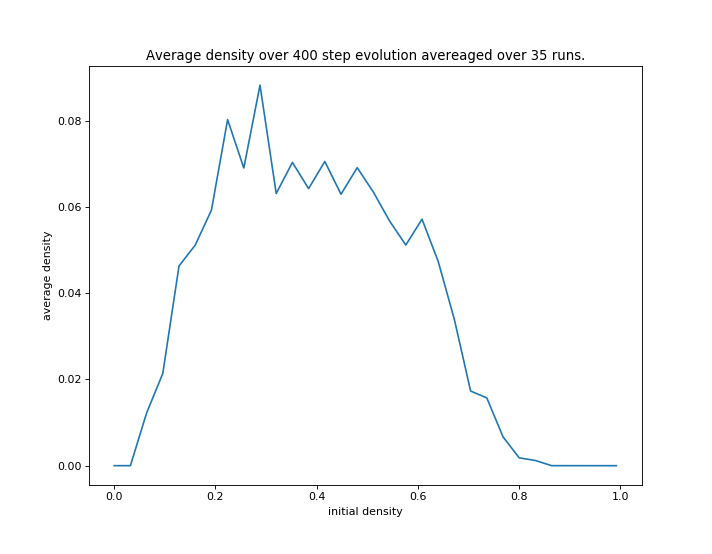

In [53]:
grid_size = 12
n_average = 35
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
initial_densities = np.arange(0., 1, 0.032)
average = np.zeros(len(initial_densities))
    
    
for j, d in enumerate(initial_densities):
    env = GameOfLifeEnv(grid_size=grid_size, density=d) #, save_states = True)
    sum_of_rewards = 0

    for i in range(n_average):
        state = env.reset()
        done = False
        
        for i in range(401):
            if not done:
                state, r, done = env.step()
            sum_of_rewards += r

    average[j] = sum_of_rewards / (401 * n_average * grid_size**2)

ax.plot(initial_densities, average)
plt.xlabel('initial density')
plt.ylabel('average density')
plt.title(f'Average density over 400 step evolution averaged over {n_average} runs.')
plt.show()

Conclusion:
- There is some dependency on the initial density.
- For the system not to die off too quickly initial density in the interval $[0.3, 0.5]$ should be use.

## Entropy
A system that begins randomly populated will, under the propagation
rules of the Conway game, develop structure and correlations. **One way to
measure the increasing order** in the system is by means of a quantity we shall
call entropy and which is defined in close analogy with the correspondingly
named quantity in statistical mechanics. The general idea is that we shall
coarse-grain our system and **measure the extent to which living cells do
or do not cluster.**  
**A J x J board is broken into grains of size j x j.** A coarse-grained
description of the state of the system is provided by the sequence $n_i i \in [1,(J/j)^2]$, where $n_i$ is the number of live cells in the i-th subregion. The
entropy associated with this coarse-grained description is given by the
logarithm (taken to the base 2) of the total number of microscopic states that
can be associated with the given sequence. Thus 
$$ S=\frac{1}{J^2} log\prod_{i=1}^{(J/j)^2} {j^2 \choose n_i}$$

this entropy is strongly related to the density so we normalize it...


<IPython.core.display.Javascript object>


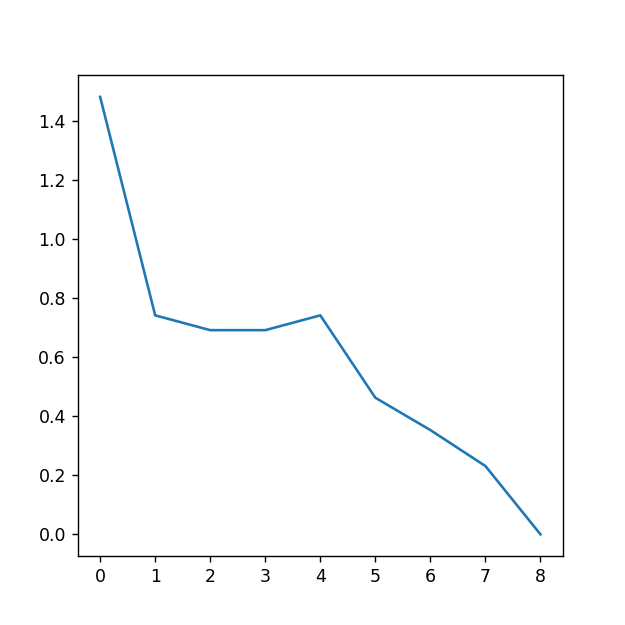

<IPython.core.display.Javascript object>

In [6]:
%matplotlib notebook

# for square grids and filters only

# test the function

env = GameOfLifeEnv(grid_size=5, density=0.6, seed=9153, save_states=True)
state = env.reset()

entropies = [get_entropy(state, 4)]
done = False
while not done:
    state, r, done = env.step(None)
    entropies.append(get_entropy(state, 3))


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(entropies)

ani = env.render()
plt.show()

<IPython.core.display.Javascript object>


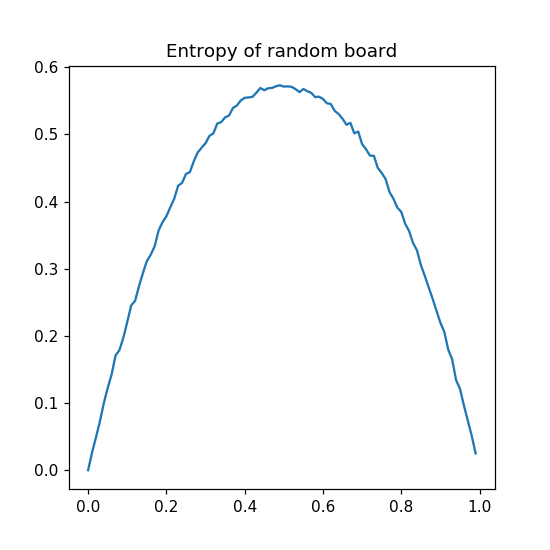

In [69]:
# calcualting entropy of random board for given denisities

get_normalized_entropy = scope_magic()

In [58]:

# print(get_random_systems_entropy(0.01))
# print(get_random_systems_entropy(0.02))
# print(get_random_systems_entropy(0.015))


env = GameOfLifeEnv(grid_size=35, density=0.6, seed=153, save_states=True)
env.reset()
state, r, done = env.step()
print(r)
get_normalized_entropy(state, 4)

0.12163265306122449
плътност: 0.12163265306122449, на тоя грид ентропито е 0.26133996201842696, а на случаен грин със същата плътност е 0.25788992370765224


1.0133779492473918

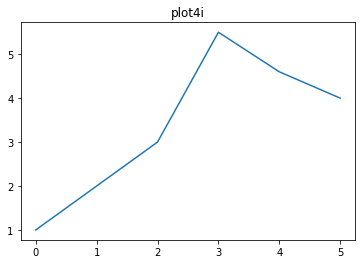

In [12]:
x = [1,2,3,5.5,4.6,4]
fig, ax = plt.subplots()
ax.plot(x)
ax.set_title('plot4i')
fig.savefig('plot4i', transparent=True)